In [1]:
# 필요한 라이브러리를 설치합니다.
%pip install node2vec

In [2]:
%pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.1 MB/s eta 0:00:00


In [3]:
# 필요한 라이브러리들을 import 합니다.
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
import pandas as pd
from faker import Faker

# Faker에 한국어 locale을 설정합니다.
fake = Faker(locale='ko_KR')

# 사용자 ID, IP, 이메일, 휴대폰 번호 노드를 생성합니다.
uid = ['uid_'+str(fake.random_int(10000, 10012)) for i in range(0,12)]
ip = ['ip_'+fake.ipv4() for i in range(0,4)]*3
uid1  = ['uid_'+str(fake.random_int(10000, 10100)) for i in range(0,100)]
email = ['em_'+fake.email() for i in range(0,50)]*2
phone = ['ph_'+fake.phone_number() for i in range(0,100)]*1


In [4]:

# 생성한 노드들을 사용하여 데이터프레임을 생성합니다.
df1 = pd.DataFrame({
    'sr':uid,
    'ds':ip
})
df2 = pd.DataFrame({
    'sr':uid1,
    'ds':email
     })
df3 = pd.DataFrame({
    'sr':email,
    'ds':phone
     })
df = pd.concat([df1,df2,df3])


In [5]:
df.head()

,sr,ds
0,uid_10005,ip_128.171.57.46
1,uid_10003,ip_161.202.232.40
2,uid_10011,ip_158.182.245.225
3,uid_10003,ip_47.81.124.138
4,uid_10007,ip_128.171.57.46


In [6]:
# 데이터프레임을 그룹화하고 인덱스를 재설정합니다.
df = df.groupby(['sr','ds']).agg({'ds': ['count']}).reset_index()
df.head()

sr               ds      
                                               count
0  em_bagjunyeong@example.com  ph_016-902-4980     1
1  em_bagjunyeong@example.com  ph_055-314-8957     1
2    em_caeweon31@example.org  ph_02-3505-1533     1
3    em_caeweon31@example.org  ph_032-886-9397     1
4    em_coejungsu@example.com  ph_055-119-3503     1

In [7]:
# 그래프 객체를 생성하고 노드들을 추가합니다.
da = df.values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))

In [8]:
da

array([['em_bagjunyeong@example.com', 'ph_016-902-4980', 1],
       ['em_bagjunyeong@example.com', 'ph_055-314-8957', 1],
       ['em_caeweon31@example.org', 'ph_02-3505-1533', 1],
       ['em_caeweon31@example.org', 'ph_032-886-9397', 1],
       ['em_coejungsu@example.com', 'ph_055-119-3503', 1],
       ['em_coejungsu@example.com', 'ph_064-702-8285', 1],
       ['em_cyang@example.org', 'ph_018-932-2183', 1],
       ['em_cyang@example.org', 'ph_033-907-9181', 1],
       ['em_eunji06@example.com', 'ph_053-465-8432', 1],
       ['em_eunji06@example.com', 'ph_055-396-9940', 1],
       ['em_eunju50@example.com', 'ph_02-2505-8520', 1],
       ['em_eunju50@example.com', 'ph_052-021-7480', 1],
       ['em_eunseo32@example.org', 'ph_041-089-3728', 1],
       ['em_eunseo32@example.org', 'ph_055-494-7025', 1],
       ['em_eunseoi@example.org', 'ph_052-389-8603', 1],
       ['em_eunseoi@example.org', 'ph_070-5731-7002', 1],
       ['em_gimbyeongceol@example.net', 'ph_016-135-8545', 1],
       ['e

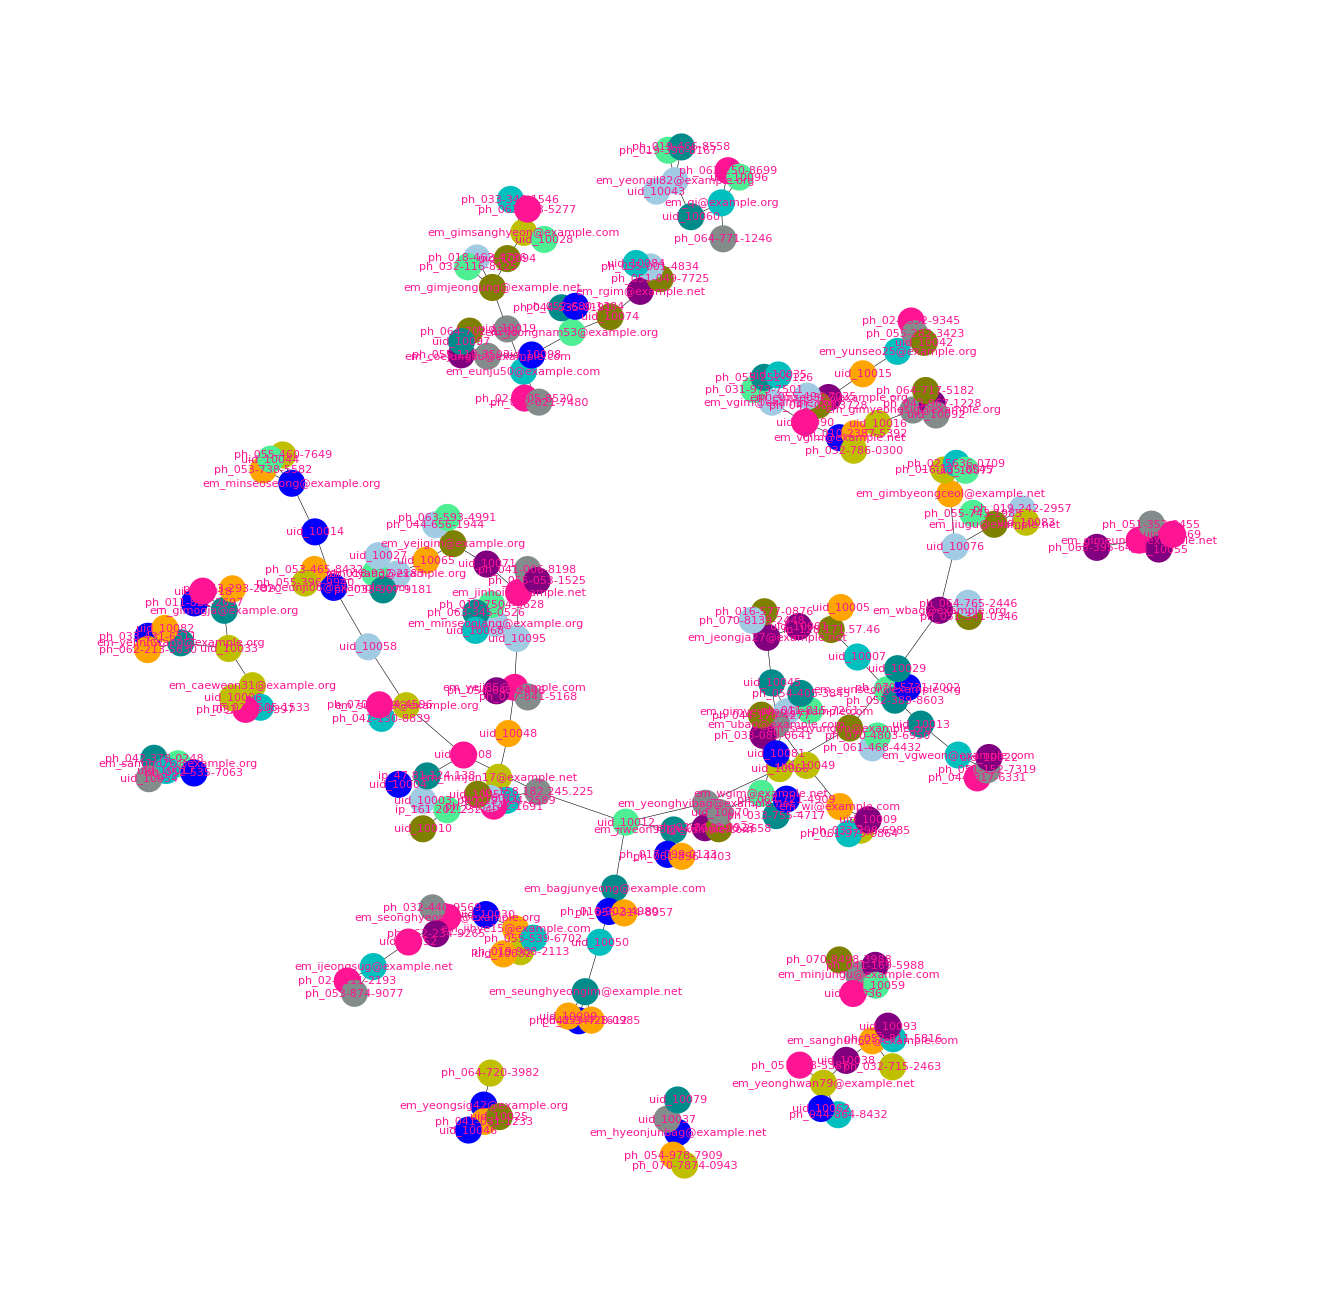

In [9]:
# 그래프를 그립니다.
colors = ['#008B8B','b','orange','y','c','DeepPink','#838B8B','purple','olive','#A0CBE2','#4EEE94']*50
colors = colors[0:len(G.nodes())]

plt.figure(figsize=(4,4),dpi=400)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 font_color = 'DeepPink',
                 node_size=15,
                 font_size=2,
                 alpha=1.0,
                 width=0.1
                 )
plt.axis('off')
plt.show()


In [10]:
# 그래프에서 연결된 컴포넌트(서브그래프)를 찾습니다.
com = list(nx.connected_components(G))
print(com)

[{'ph_033-089-0641', 'em_minseoseong@example.org', 'uid_10003', 'uid_10049', 'ph_033-755-4717', 'uid_10029', 'uid_10081', 'uid_10013', 'ph_064-765-2446', 'ph_016-577-0876', 'ph_070-2724-4596', 'em_vgweon@example.com', 'em_jiweon95@example.com', 'ph_033-398-6985', 'ph_016-135-8545', 'ph_051-152-7319', 'uid_10010', 'ph_053-428-0985', 'ph_061-468-4432', 'uid_10076', 'em_ubag@example.com', 'uid_10007', 'em_bagjunyeong@example.com', 'ph_042-947-1612', 'ph_055-314-8957', 'ph_054-405-3845', 'ph_061-896-4403', 'uid_10083', 'uid_10004', 'uid_10014', 'ip_161.202.232.40', 'ph_053-738-5582', 'ph_02-5636-0709', 'em_jiugu@example.net', 'uid_10045', 'ph_019-242-2957', 'em_wbag@example.org', 'ph_070-5731-7002', 'ph_055-743-1985', 'ph_070-8139-2448', 'em_sujin09@example.org', 'uid_10012', 'uid_10066', 'ph_070-4803-6950', 'em_wi@example.com', 'ph_051-341-0346', 'ph_02-8448-0923', 'em_seunghyeongim@example.net', 'ph_017-099-0133', 'em_wgim@example.net', 'em_eunji06@example.com', 'uid_10008', 'em_seoyungi

In [11]:
# 각 컴포넌트를 그룹으로 나눕니다.
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'object_id': list(com[i])})
    df_com = pd.concat([df_com,d])

# 그룹의 크기를 확인합니다.
df_com.groupby('group_id').count().sort_values(by='object_id', ascending=False)

,object_id
group_id,
0,84
2,25
3,25
4,21
1,13
7,12
9,9
11,9
5,5


In [12]:

# Node2Vec 모델을 설정하고 훈련합니다.
node2vec = Node2Vec(G,
                    dimensions=64,
                    walk_length=30,
                    num_walks=200,
                    workers=4
                    )

model = node2vec.fit(window=10,
                     min_count=1,
                     batch_words=4
                     )


Computing transition probabilities:   0%|          | 0/223 [00:00<?, ?it/s]

In [13]:
# Node2Vec 모델을 이용하여 'uid_10033'과 가장 유사한 노드들을 찾습니다.
model.wv.most_similar('uid_10033', topn = 20)

[('ph_032-886-9397', 0.9316595792770386),
 ('uid_10006', 0.9286421537399292),
 ('ph_062-213-5630', 0.9283448457717896),
 ('em_yejinhwang@example.org', 0.9278592467308044),
 ('uid_10018', 0.9273951053619385),
 ('ph_033-431-6511', 0.9267178773880005),
 ('ph_011-821-2697', 0.9250024557113647),
 ('em_caeweon31@example.org', 0.9242773056030273),
 ('em_gimogja@example.org', 0.9221827983856201),
 ('uid_10082', 0.9219235777854919),
 ('ph_02-3505-1533', 0.9185313582420349),
 ('ph_043-293-2820', 0.9170717000961304),
 ('uid_10069', 0.43199557065963745),
 ('em_sangho76@example.org', 0.4316173493862152),
 ('ph_051-352-3455', 0.4305802881717682),
 ('em_hyeonjunbag@example.net', 0.4300907552242279),
 ('ph_041-031-1233', 0.4290701448917389),
 ('uid_10017', 0.42901185154914856),
 ('ph_070-8498-3988', 0.4285590648651123),
 ('uid_10055', 0.4284714162349701)]

> #### 그룹 ID가 0인 노드들이 어떻게 연결되는지 살펴보겠습니다.

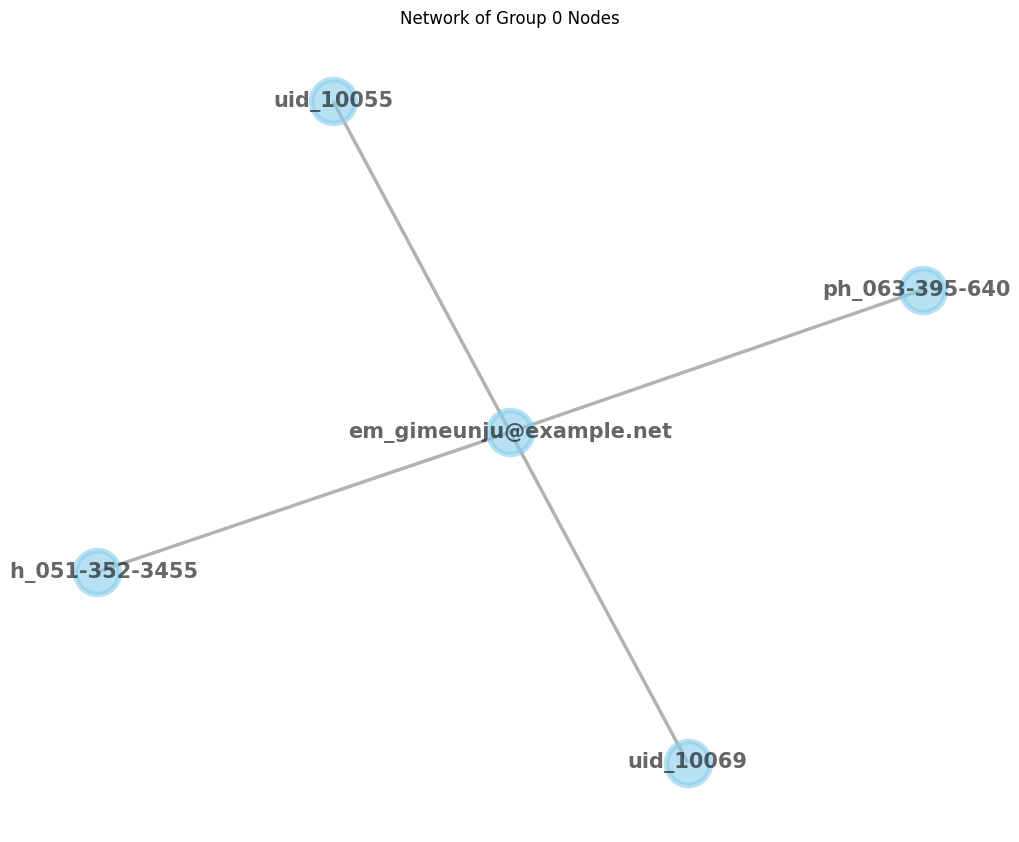

In [14]:
# 'df_com'에서 그룹 ID가 0인 노드들을 선택합니다.
group_0_nodes_sr = df_com[df_com['group_id'] == 5]['object_id']

# 'df'에서 sr 또는 ds 컬럼이 그룹 0에 속한 노드들과 일치하는 row들을 선택합니다.
ls = df[(df[('sr', '')].isin(group_0_nodes_sr)) & (df[('ds', '')].isin(group_0_nodes_sr))]

import networkx as nx
import matplotlib.pyplot as plt

# 위에서 필터링한 데이터프레임 'ls'를 이용하여 그래프 생성
G = nx.from_pandas_edgelist(ls, source=('sr', ''), target=('ds', ''))

# 그래프 시각화
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", node_shape="o", alpha=0.6, linewidths=4, font_size=15, font_weight="bold", width=2.5, edge_color="gray")
plt.title("Network of Group 0 Nodes")
plt.show()
